## Transfer Learning
* Notice that resnet50 folder has 2 pre-trained weights files... resnet50_weights_tf_dim_ordering_tf_kernels.h5 & resnet50_weights_tf_dim_ordering_tf_kernels_NOTOP.h5
* The resnet50_weights_tf_dim_ordering_tf_kernels.h5 weights is useful for pure prediction of test image and this prediction will rely completely on ResNet50 pre-trained weights, i.e., it does not expected any training from our side
* Our intention in this kernel is Transfer Learning by using ResNet50 pre-trained weights except its TOP layer, i.e., the resnet50_weights_tf_dim_ordering_tf_kernels_NOTOP.h5 weights... 
* Use this weights as initial weight for training new layer using train images

#### The most common incarnation of transfer learning in the context of deep learning is the following worfklow:

* Take layers from a previously trained model.
* Freeze them, so as to avoid destroying any of the information they contain during future training rounds.
* Add some new, trainable layers on top of the frozen layers. They will learn to turn the old features into predictions on a new dataset.
* Train the new layers on your dataset.

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
# for downloading the .h5 and NOTOP.h5 files
#ResNet50(include_top=True)
#ResNet50(include_top=False)

In [4]:
resnet_w_path = r"C:\Users\Dell\.keras\models\resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [5]:
ResNet50().summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [6]:
model = Sequential()
model.add(ResNet50(include_top=False, 
                   pooling='avg',
                  weights = resnet_w_path))
model.add(Dense(2, activation='softmax'))
model.layers[0].trainable = False
# this is freezing the weights
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

In [8]:
# Generate batches of tensor image data with real-time data augmentation.
datagen_train = ImageDataGenerator(preprocessing_function=preprocess_input)
datagen_test = ImageDataGenerator(preprocessing_function=preprocess_input)

training_set=datagen_train.flow_from_directory(r'../datafiles/smalldataset/training_set', 
                                                target_size=(224,224), 
                                               batch_size=64,
                                               class_mode = 'categorical')
test_set=datagen_train.flow_from_directory(r'../datafiles/smalldataset/test_set',
                                                target_size=(224,224), 
                                               batch_size=64,
                                               class_mode = 'categorical')
# class_mode='categorical' if you have more than 2 classses

Found 200 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [10]:
model.fit(training_set, epochs=2, validation_data=test_set)

Epoch 1/2
4/4 [==============================] - 28s 7s/step - loss: 0.8846 - val_loss: 0.4744
Epoch 2/2
4/4 [==============================] - 24s 6s/step - loss: 0.3653 - val_loss: 0.2741


In [11]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

(64, 64, 3)


array([[0.00081818, 0.9991818 ]], dtype=float32)

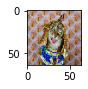

In [12]:
img = image.load_img(r"E:\PythonCore\datafiles\SmallDataset\single_prediction\c4.jpg"
                    ,target_size = (64,64))
plt.figure(figsize=(1,1))
plt.imshow(img);
test_img = np.asarray(img)
print(test_img.shape)
# reshape to add 1 row
test_img = test_img.reshape(1,64,64,3)
test_img = preprocess_input(test_img)
np.set_printoptions(suppress = True)
model.predict(test_img)